# Importing Libraries 

In [1]:
import numpy as np
import pandas as pd

# Importing Dataset

In [4]:
dataset=pd.read_csv('collegePlace.csv')
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [7]:
dataset.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [8]:
print(x)

[[22 'Male' 'Electronics And Communication' ... 8 1 1]
 [21 'Female' 'Computer Science' ... 7 1 1]
 [22 'Female' 'Information Technology' ... 6 0 0]
 ...
 [22 'Male' 'Information Technology' ... 7 0 0]
 [22 'Male' 'Computer Science' ... 7 0 0]
 [23 'Male' 'Civil' ... 8 0 0]]


In [9]:
print(y)

[1 1 1 ... 0 0 1]


# Data Pre-Processing

In [5]:
dataframe['Gender'].replace({'Male':'0','Female':'1'},inplace=True)

In [6]:
dataframe.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,0,Electronics And Communication,1,8,1,1,1
1,21,1,Computer Science,0,7,1,1,1
2,22,1,Information Technology,1,6,0,0,1
3,21,0,Information Technology,0,8,0,1,1
4,22,0,Mechanical,0,8,1,0,1


In [7]:
dataframe['Stream'].unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [8]:
dataframe['Stream'].replace({'Electronics And Communication':'0','Computer Science':'1','Information Technology':'2','Mechanical':'3','Electrical':'4','Civil':'5'},inplace=True)

In [9]:
dataframe.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,0,0,1,8,1,1,1
1,21,1,1,0,7,1,1,1
2,22,1,2,1,6,0,0,1
3,21,0,2,0,8,0,1,1
4,22,0,3,0,8,1,0,1


In [10]:
dataframe.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [11]:
import matplotlib.pyplot as plt

In [12]:
age=dataframe['Age']
stream=dataframe['Stream']
internship=dataframe['Internships']
cgpa=dataframe['CGPA']
hostel=dataframe['Hostel']
backlog=dataframe['HistoryOfBacklogs']
Y=dataframe['PlacedOrNot']

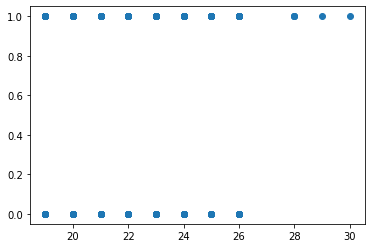

In [13]:
plt.scatter(age,Y)

In [14]:
Y = dataframe["PlacedOrNot"]
X = dataframe.drop(["PlacedOrNot"],axis = 1) 

In [15]:
X

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
0,22,0,0,1,8,1,1
1,21,1,1,0,7,1,1
2,22,1,2,1,6,0,0
3,21,0,2,0,8,0,1
4,22,0,3,0,8,1,0
...,...,...,...,...,...,...,...
2961,23,0,2,0,7,0,0
2962,23,0,3,1,7,1,0
2963,22,0,2,1,7,0,0
2964,22,0,1,1,7,0,0


In [16]:
#Y = pd.DataFrame(Y)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_Test = train_test_split(X, Y, test_size=0.1)

In [18]:
from xgboost import XGBClassifier

In [19]:
clf = XGBClassifier(learning_rate=0.09,n_estimators=150)

In [20]:
clf.fit(X_train._get_numeric_data(), Y_train,eval_metric='logloss')

C:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.09, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=150,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [21]:
predictions=clf.predict(X_test._get_numeric_data())

In [22]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
print("accuracy_score: " + str(accuracy_score(Y_Test, predictions)))

accuracy_score: 0.8787878787878788


In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [26]:
result = clf.predict(sc.fit_transform([[22,0,6,0,0]]))
print(result)

[0]


In [28]:
!pip freeze > requirements2.txt